In [1]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390486,499,0.000000,0.000142,0.000142,0.005829,0.020342,0.015396,1,-1.649365,-1.169996,...,-1.896874,-1.260055,1.947725,-1.994399,-1.685163,-2.866165,-0.216130,-1.892048,0.901585,2390486
2390487,499,0.000000,0.000012,0.000012,-0.000935,-0.006326,-0.004718,1,2.432943,5.284504,...,-0.936553,1.064936,3.119762,-0.419796,-0.208975,-0.146749,0.730166,0.648452,2.068737,2390487
2390488,499,0.000000,0.000499,0.000499,0.007605,0.024907,0.016591,1,-0.622475,-0.963682,...,-2.956745,-0.640334,-2.279663,-0.950259,-4.388417,-1.669922,-3.288939,-1.336142,-2.814239,2390488
2390489,499,0.283405,-0.000156,-0.000156,-0.001375,-0.003702,-0.002004,-1,-1.463757,-1.107228,...,-2.035894,-1.780962,0.881246,-2.202140,-1.912601,-3.341684,-0.571188,-2.185795,0.627452,2390489


<AxesSubplot:xlabel='date'>

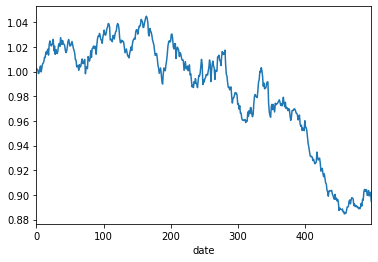

In [39]:
df_train.groupby('date').apply(lambda x: (x['weight']*x['resp']).mean()+1).cumprod().plot()

<AxesSubplot:>

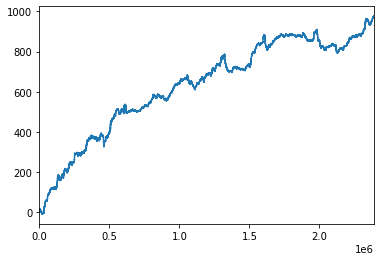

In [30]:
df_train['resp'].cumsum().plot()

In [20]:
df_train['action'] = df_train['resp']>0

In [23]:
df_new = df_train.groupby('date').apply(lambda x: pd.Series({'p':(x['weight']*x['resp']*x['action']).sum()})).reset_index()

In [25]:
df_new['p'].sum()

37360.37802994461

In [27]:
np.sqrt((df_new['p']**2).sum())

1927.7404253766147

In [28]:
37360.37802994461/1927.7404253766147

19.38039869794486

In [18]:
df_train[df_train['weight']==0]['ts_id'].nunique()

409204

In [5]:
df_features = pd.read_csv('features.csv')

<AxesSubplot:>

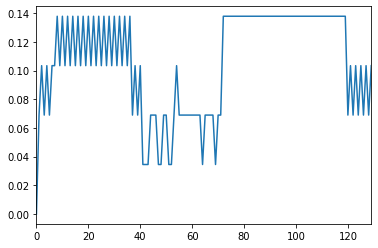

In [10]:
df_features.mean(axis=1).plot()

In [11]:
df_test = pd.read_csv('example_test.csv')

In [12]:
df_test

,weight,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,date,ts_id
0,0.000000,1,-1.872746,-2.191242,-0.474163,-0.323046,0.014688,-0.002484,NaN,NaN,...,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0,0
1,16.673515,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,NaN,NaN,...,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,0,1
2,0.000000,-1,0.812780,-0.256156,0.806463,0.400221,-0.614188,-0.354800,NaN,NaN,...,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,0,2
3,0.000000,-1,1.174378,0.344640,0.066872,0.009357,-1.006373,-0.676458,NaN,NaN,...,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,0,3
4,0.138531,1,-3.172026,-3.093182,-0.161518,-0.128149,-0.195006,-0.143780,NaN,NaN,...,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15214,0.000000,1,-1.213240,-1.557117,0.530793,0.382429,0.316811,0.240976,0.741902,0.680989,...,1.655182,2.551488,0.525934,1.242721,1.977483,2.563083,1.857149,2.424928,2,15214
15215,0.000000,1,-0.413328,-0.642504,0.429951,0.333967,-0.728263,-0.637617,0.204294,0.138052,...,6.393191,22.159397,-0.101824,3.804838,1.780150,7.504901,4.702145,15.376130,2,15215
15216,0.000000,1,-1.378947,-1.702976,0.548763,0.396754,0.328203,0.249898,0.784458,0.730435,...,1.740141,2.685696,0.527251,1.245219,1.981606,2.567519,1.876328,2.450874,2,15216
15217,0.000000,1,-0.324708,-1.089962,-0.873900,-0.544143,-1.265208,-0.844335,2.302628,1.978776,...,5.243907,11.789678,0.310616,2.660067,3.052869,6.399390,5.396259,10.972647,2,15217


In [13]:
df = pd.read_csv('example_sample_submission.csv')

In [14]:
df

,ts_id,action
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
15214,15214,1
15215,15215,1
15216,15216,1
15217,15217,1
